In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [10]:
# Read Files
df = pd.read_excel('data.xlsx')

df.head()

# Separate the features (X) and target variable (y)
X = df.drop('DroppedOut', axis=1)
y = df['DroppedOut']
# Convert y to a numpy array
y = np.array(y)

# Perform z-score normalization on the features 
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [11]:
# Lists to store the metrics of each fold
confusion_matrices = []
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Perform stratified K-fold cross-validation with 8 folds
skf = StratifiedKFold(n_splits=8)

# Train a Gradient Boosting classifier on each fold
gb = GradientBoostingClassifier()

for train_index, test_index in skf.split(X_normalized, y):
    X_train, X_test = X_normalized[train_index], X_normalized[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train the Gradient Boosting classifier
    gb.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = gb.predict(X_test)
    
    # Compute the confusion matrix and store it in the list
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)
    
    # Compute the metrics and store them in the lists
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, average='weighted'))
    recalls.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

In [4]:
# Print the confusion matrices
for i, cm in enumerate(confusion_matrices):
    print(f"Confusion matrix for fold {i+1}:\n", cm)
    
# Compute the macro averages
macro_precision = precision_score(y_test, y_pred, average='macro')
macro_recall = recall_score(y_test, y_pred, average='macro')
macro_f1 = f1_score(y_test, y_pred, average='macro')

# Print the metrics
print("Model Accuracy:", np.mean(accuracies))
print("Weighted Average Precision:", np.mean(precisions))
print("Weighted Average Recall:", np.mean(recalls))
print("Weighted Average F1-score:", np.mean(f1_scores))
print("Macro Average Precision:", macro_precision)
print("Macro Average Recall:", macro_recall)
print("Macro Average F1-score:", macro_f1)

Confusion matrix for fold 1:
 [[154  11]
 [ 10  46]]
Confusion matrix for fold 2:
 [[155  10]
 [  6  50]]
Confusion matrix for fold 3:
 [[154  11]
 [ 12  44]]
Confusion matrix for fold 4:
 [[156   9]
 [  5  51]]
Confusion matrix for fold 5:
 [[153  12]
 [ 13  43]]
Confusion matrix for fold 6:
 [[153  12]
 [ 10  46]]
Confusion matrix for fold 7:
 [[152  13]
 [  6  50]]
Confusion matrix for fold 8:
 [[151  13]
 [  7  49]]
Model Accuracy: 0.9094508432743726
Weighted Average Precision: 0.9113310861910175
Weighted Average Recall: 0.9094508432743726
Weighted Average F1-score: 0.9100463992698279
Macro Average Precision: 0.8730093915884034
Macro Average Recall: 0.8978658536585367
Macro Average F1-score: 0.8841983366670176


In [12]:
# Get feature importances
feature_importances = gb.feature_importances_

# Create a DataFrame of features and their importances
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
features_df = features_df.sort_values('Importance', ascending=False)

# Print the feature importances
print(features_df)

                            Feature  Importance
18  ContinuousAbsenceSinceLastLogin    0.439704
26               NumPassedWorkshops    0.382480
30            AttendedSessionsCount    0.056969
24         NumOfAttemptedActivities    0.016850
28   NumWorkshopsWithNullPassStatus    0.013764
19                          Awarded    0.010582
0                 AgeAtregistration    0.009009
20                              New    0.008730
31         NotAttendedSessionsCount    0.007123
33         NotRecordedSessionsCount    0.006458
27            NumWithdrawnWorkshops    0.006333
17                   RegularPresent    0.005990
29        TotalNumEnrolledWorkshops    0.005428
16                   PathologyScore    0.004257
22                         Rejected    0.004155
23                          Working    0.004128
15                 MHLearningSchool    0.003855
25               NumFailedWorkshops    0.002707
32             ExcusedSessionsCount    0.002610
7                  PHChronicDisease    0

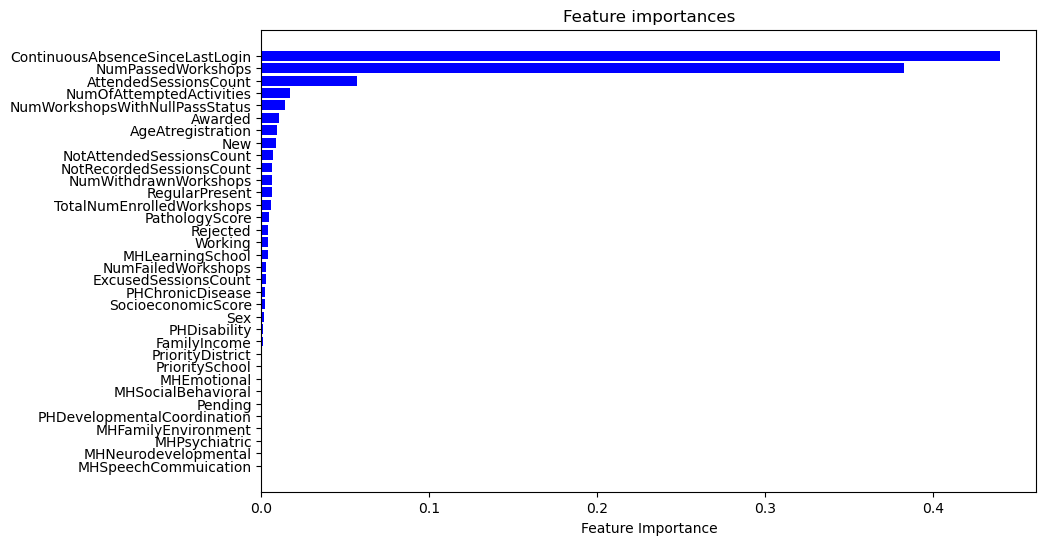

In [15]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.barh(features_df['Feature'], features_df['Importance'], color='b', align='center')
plt.xlabel("Feature Importance")
plt.gca().invert_yaxis()

# Save the plot as a PNG file
plt.savefig('../visualizations/featureimp-gradient-boosting.png', bbox_inches='tight')

plt.show()

In [25]:
# Select the top 10 features
top_features = features_df['Feature'][:10]

# Select only the top features from X
X_top_features = X[top_features]

X_top_features.shape

X_normalized = scaler.fit_transform(X)

(1767, 10)

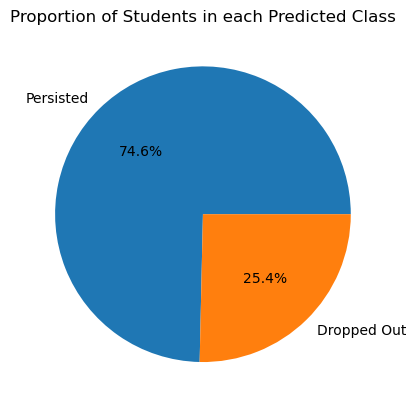

In [13]:
import matplotlib.pyplot as plt

# Count the number of students in each class
class_counts = df['DroppedOut'].value_counts()

# Change the class labels
class_counts.index = ['Persisted', 'Dropped Out']

# Create a pie chart of the counts
class_counts.plot(kind='pie', autopct='%1.1f%%')

plt.title('Proportion of Students in each Predicted Class')
plt.ylabel('')  # This line removes the y-axis label for the pie chart

# Save the figure
plt.savefig('pie_chart.png', bbox_inches='tight')

plt.show()


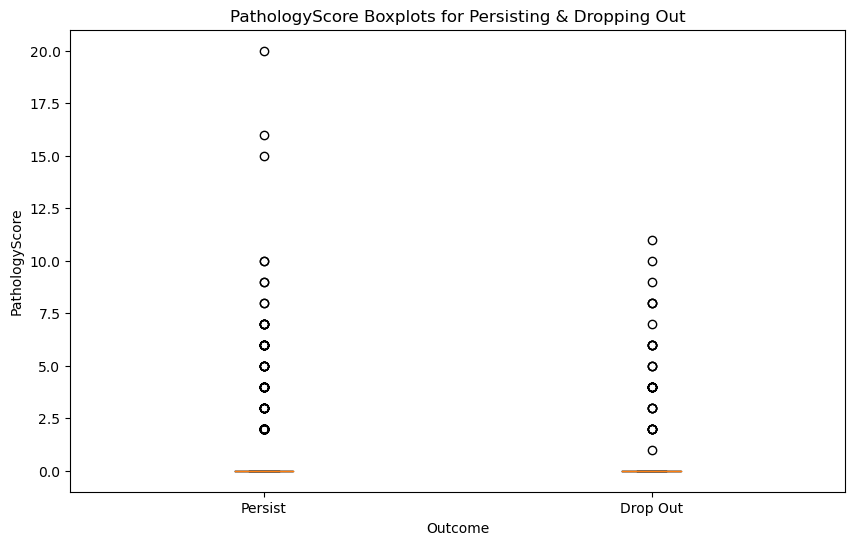

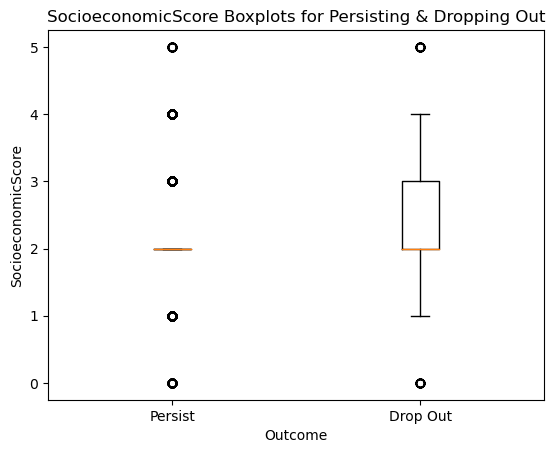

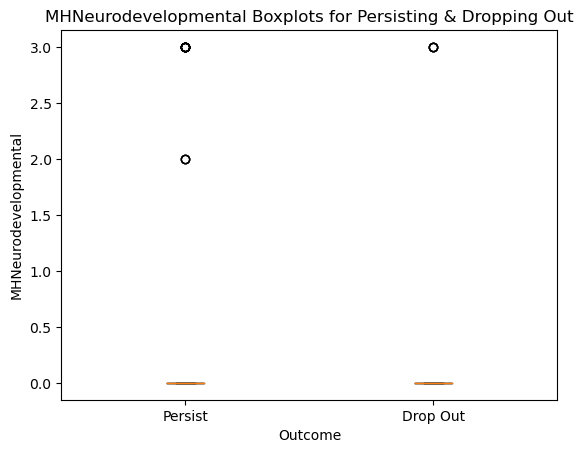

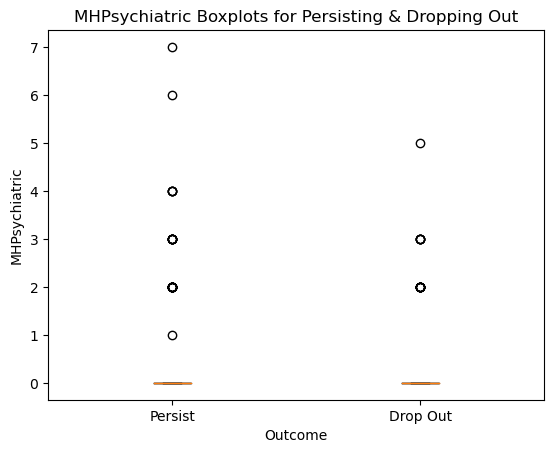

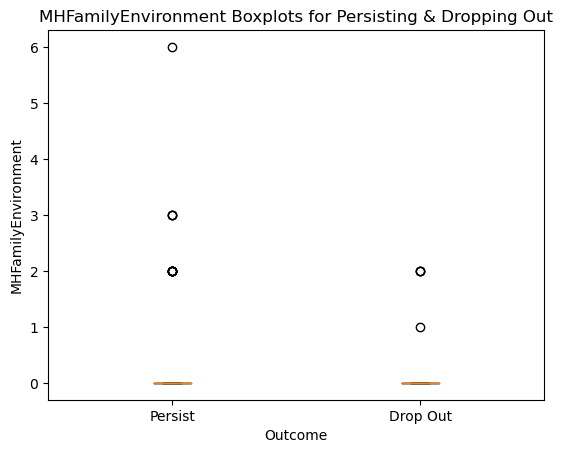

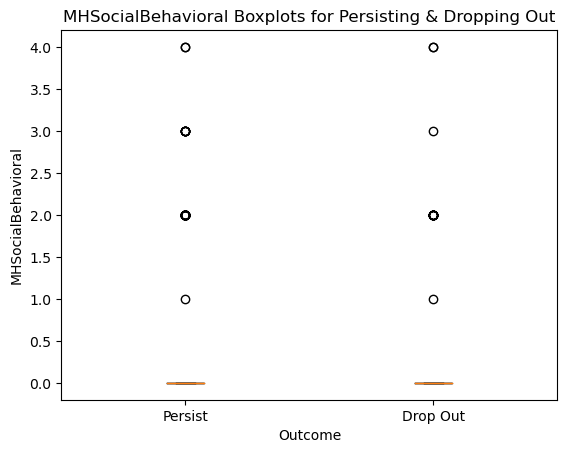

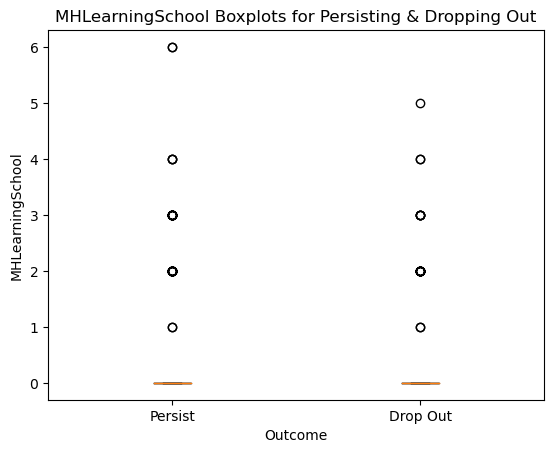

In [248]:
significant_features = ['PathologyScore', 'SocioeconomicScore', 'MHNeurodevelopmental', 'MHPsychiatric', 'MHFamilyEnvironment', 'MHSocialBehavioral', 'MHLearningSchool']

# Create boxplots of the significant features for each class
plt.figure(figsize=(10, 6))
for feature in significant_features:
    plt.boxplot([X.loc[y == 0, feature], X.loc[y == 1, feature]], labels=['Persist', 'Drop Out'])
    plt.xlabel('Outcome')
    plt.ylabel(feature)
    plt.title(f'{feature} Boxplots for Persisting & Dropping Out')
    plt.show()

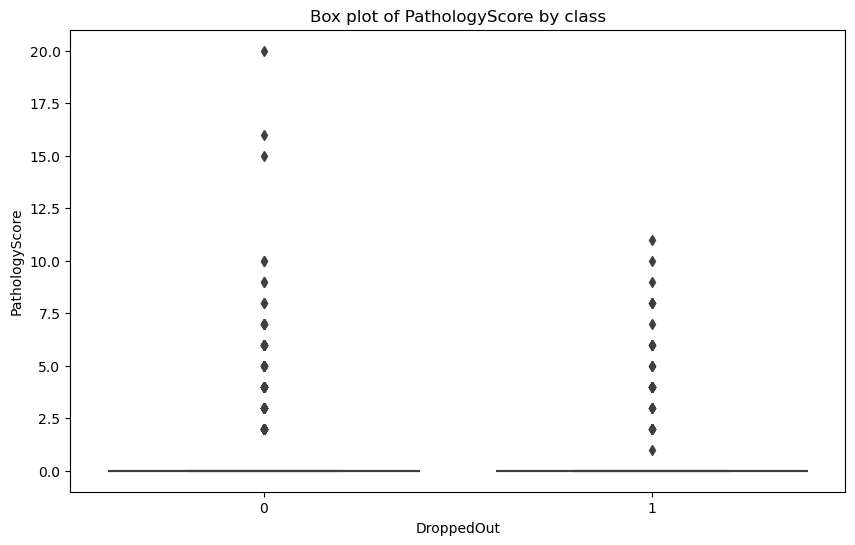

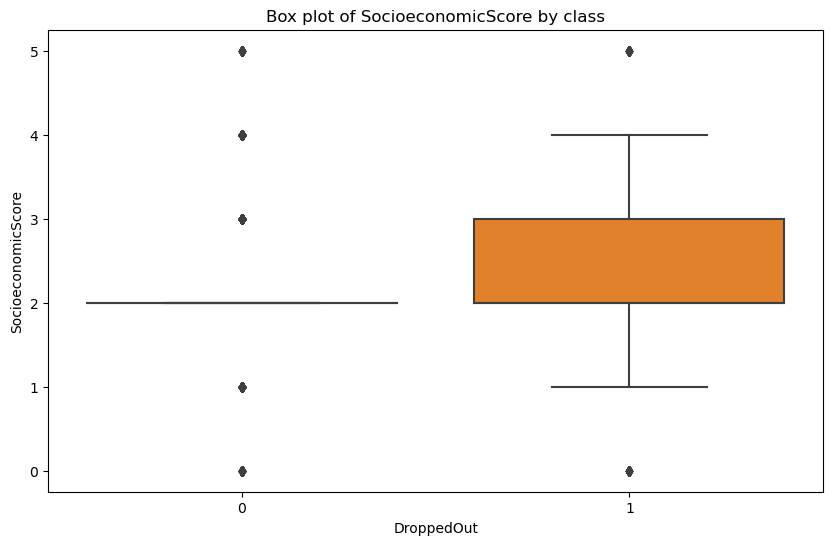

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of features to plot
features = ['PathologyScore', 'SocioeconomicScore']  # replace with your features

# For each feature, we create a separate box plot for each class
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='DroppedOut', y=feature, data=df)
    plt.title('Box plot of {} by class'.format(feature))
    plt.show()